In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#loading the data set
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

#filling missing values in sleep disorder feature
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

#dividing dependand and independant variayables 
y = df['Stress Level']
X = df.drop("Stress Level", axis=1)

#dividing uper and lover blood presure in independant variyable
X[['Upper Blood Pressure', 'Lower Blood Pressure']] = X["Blood Pressure"].apply(lambda x: pd.Series(str(x).split("/")))
X = X.drop(columns=(['Blood Pressure', 'Person ID']), axis=1)

#one hot encording in independant variyable
X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype=int)

#One HOT encording in dependant variyable
y = pd.get_dummies(y, dtype=int)

#spliting data set in to train and test data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = preprocessing.StandardScaler().fit(x_train)

#scaling x data 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [2]:
# Renaka Gamage

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



mlp = MLPClassifier(hidden_layer_sizes=(100, 60), max_iter=10000)


model = mlp.fit(x_train, y_train)

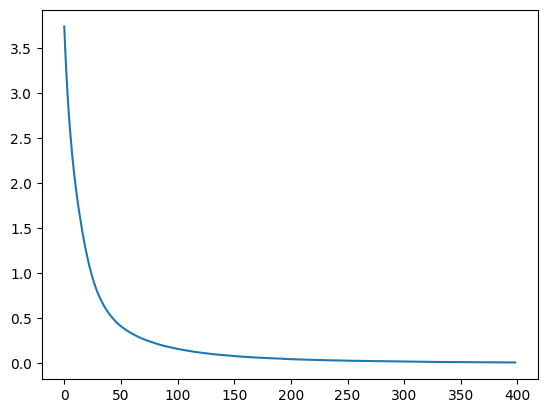

In [3]:
plt.plot(mlp.loss_curve_)

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(x_test)


print("Acuracy", accuracy_score(y_test, y_pred))
print("Precision_score", precision_score(y_test, y_pred, average='weighted'))
print("Recall_score", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score", f1_score(y_test, y_pred, average='weighted'))


Acuracy 0.9646017699115044
Precision_score 0.9823008849557522
Recall_score 0.9646017699115044
F1 Score 0.9731760078662735
